## Deep Convolutional Neural Networks (CNN) with Keras + TensorFlow
----------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------

# HongSuk Choi

In [2]:
import sys; sys.path

['',
 'C:\\Users\\ic07949\\AppData\\Local\\Continuum\\anaconda3\\python36.zip',
 'C:\\Users\\ic07949\\AppData\\Local\\Continuum\\anaconda3\\DLLs',
 'C:\\Users\\ic07949\\AppData\\Local\\Continuum\\anaconda3\\lib',
 'C:\\Users\\ic07949\\AppData\\Local\\Continuum\\anaconda3',
 'C:\\Users\\ic07949\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages',
 'C:\\Users\\ic07949\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\win32',
 'C:\\Users\\ic07949\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\ic07949\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\ic07949\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\ic07949\\.ipython']

In [1]:

# "Sequential" model lets us to define a stack of neural network layers
from keras.models import Sequential

# import the "core" layers:
from keras.layers import Dense, Dropout, Activation, Flatten

import numpy as np
np.random.seed(0)

C:\Users\ic07949\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# CNN
from keras.layers import Convolution2D, MaxPooling2D

In [3]:
# import some utilities to transform our data
from keras.utils import np_utils

In [271]:
from keras.optimizers import SGD

## Let's use the Fashion-MNIST Dataset including 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images:

0:	T-shirt/top, 
1:	Trouser,
2:	Pullover,
3:	Dress,
4:	Coat,
5:	Sandal,
6:	Shirt,
7:	Sneaker,
8:	Bag,
9:	Ankle boot 

In [248]:
# Keras will download MNIST dataset for us:
from keras.datasets import fashion_mnist
 
# By default, the first 60k of MNIST has been defined as training and the rest as testing set: 
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [249]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


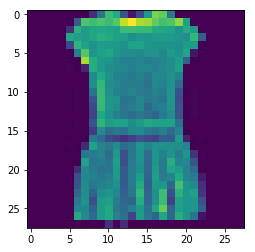

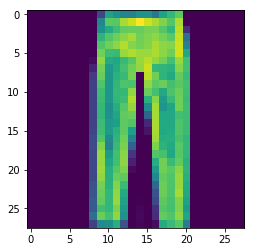

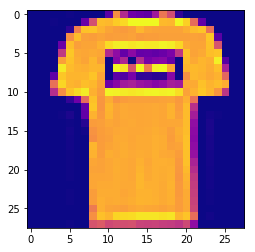

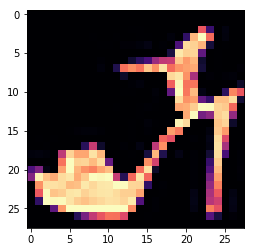

In [250]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

imgplot = plt.imshow(X_train[3,:,:],cmap='viridis')
plt.show()
imgplot = plt.imshow(X_train[16,:,:],cmap='viridis')
plt.show()
imgplot = plt.imshow(X_train[1,:,:],cmap='plasma')
plt.show()
imgplot = plt.imshow(X_train[9,:,:],cmap='magma')
plt.show()

In [251]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [252]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [253]:
# simply normalize the features to the range of [0,1]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [254]:
# output label:
print (y_train.shape)
print (y_train[:10])

(60000,)
[9 0 0 3 0 2 7 2 5 5]


In [255]:
# OneHotEncoding for the output label:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)


In [256]:
# Label after OneHotEncoding:
print (y_train.shape)
print (y_train[:10])

(60000, 10)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


## Define the Network Architecture (model):

In [298]:
# Declare Sequential model fro our network:
model = Sequential()

In [299]:
# CNN first layer (with 32 3x3 filter):
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
#print(model.output_shape) # -> (None, 26, 26, 32)

# If your image batch is of N images of HxW size with C channels: 
# theano uses the NCHW ordering while tensorflow uses the NHWC ordering.

In [300]:
# more hidden layers:
model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.25))

In [301]:
# output Fully connected Dense layers:
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100, activation='softmax'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

## Compile the model:
#### We need to compile the model and then it will be ready to train it:

In [302]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
# more info about loss functions: https://keras.io/losses
# more infor about Optimizers: https://keras.io/optimizers
#sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#model.compile( loss = "categorical_crossentropy", optimizer = sgd,  metrics=['accuracy'] )

#opt = SGD(lr=0.01)

#model.compile(loss = "categorical_crossentropy", optimizer = opt, metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_50 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_53 (Dropout)         (None, 12, 12, 32)        0         
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 4, 4, 32)          0         
_________________________________________________________________
dropout_54 (Dropout)         (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_29 (Flatten)         (None, 512)               0         
__________

## Training:

In [309]:
history = model.fit(X_train, y_train, batch_size=100, epochs=300, verbose=1)
# history = model.fit(X_train, y_train, validation_split=0.25, batch_size=32, epochs=15, verbose=1)

# batch_size: Integer or None. Number of samples per gradient update. 
# epochs: Number of iteration over the entire x and y data provided. 
# verbose: 0, 1, or 2. how want to see the training progress. 0 = silent, 1 = progress bar, 2 = one line per epoch.
# validation_split: Float between 0 and 1. Fraction of the training data to be used as validation data. 
# You can add some callbacks to get a view on internal states and statistics of the model during training:
# https://keras.io/callbacks/     

Epoch 1/300
60000/60000 [==============================] - 65s 1ms/step - loss: 0.1765 - acc: 0.9438
Epoch 2/300
60000/60000 [==============================] - 64s 1ms/step - loss: 0.1728 - acc: 0.9435
Epoch 3/300
60000/60000 [==============================] - 64s 1ms/step - loss: 0.1734 - acc: 0.9435
Epoch 4/300
60000/60000 [==============================] - 66s 1ms/step - loss: 0.1758 - acc: 0.9444
Epoch 5/300
60000/60000 [==============================] - 66s 1ms/step - loss: 0.1748 - acc: 0.9428
Epoch 6/300
60000/60000 [==============================] - 67s 1ms/step - loss: 0.1674 - acc: 0.9460
Epoch 7/300
60000/60000 [==============================] - 65s 1ms/step - loss: 0.1712 - acc: 0.9452
Epoch 8/300
60000/60000 [==============================] - 64s 1ms/step - loss: 0.1720 - acc: 0.9433
Epoch 9/300
60000/60000 [==============================] - 64s 1ms/step - loss: 0.1702 - acc: 0.9446
Epoch 10/300
60000/60000 [==============================] - 64s 1ms/step - loss: 0.1702 - a

60000/60000 [==============================] - 64s 1ms/step - loss: 0.1403 - acc: 0.9535
Epoch 82/300
60000/60000 [==============================] - 64s 1ms/step - loss: 0.1438 - acc: 0.9523
Epoch 83/300
60000/60000 [==============================] - 64s 1ms/step - loss: 0.1355 - acc: 0.9559
Epoch 84/300
60000/60000 [==============================] - 64s 1ms/step - loss: 0.1382 - acc: 0.9545
Epoch 85/300
60000/60000 [==============================] - 64s 1ms/step - loss: 0.1362 - acc: 0.9557
Epoch 86/300
60000/60000 [==============================] - 64s 1ms/step - loss: 0.1396 - acc: 0.9548
Epoch 87/300
60000/60000 [==============================] - 62s 1ms/step - loss: 0.1337 - acc: 0.9558
Epoch 88/300
60000/60000 [==============================] - 63s 1ms/step - loss: 0.1345 - acc: 0.9563
Epoch 89/300
60000/60000 [==============================] - 66s 1ms/step - loss: 0.1385 - acc: 0.9550
Epoch 90/300
60000/60000 [==============================] - 66s 1ms/step - loss: 0.1416 - acc: 

60000/60000 [==============================] - 65s 1ms/step - loss: 0.1232 - acc: 0.9605
Epoch 161/300
60000/60000 [==============================] - 65s 1ms/step - loss: 0.1182 - acc: 0.9607
Epoch 162/300
60000/60000 [==============================] - 65s 1ms/step - loss: 0.1229 - acc: 0.9594
Epoch 163/300
60000/60000 [==============================] - 65s 1ms/step - loss: 0.1274 - acc: 0.9589
Epoch 164/300
60000/60000 [==============================] - 65s 1ms/step - loss: 0.1233 - acc: 0.9590
Epoch 165/300
60000/60000 [==============================] - 65s 1ms/step - loss: 0.1208 - acc: 0.9605
Epoch 166/300
60000/60000 [==============================] - 65s 1ms/step - loss: 0.1197 - acc: 0.9609
Epoch 167/300
60000/60000 [==============================] - 64s 1ms/step - loss: 0.1216 - acc: 0.9600
Epoch 168/300
60000/60000 [==============================] - 64s 1ms/step - loss: 0.1241 - acc: 0.9594
Epoch 169/300
60000/60000 [==============================] - 64s 1ms/step - loss: 0.121

60000/60000 [==============================] - 64s 1ms/step - loss: 0.1099 - acc: 0.9646
Epoch 240/300
60000/60000 [==============================] - 64s 1ms/step - loss: 0.1093 - acc: 0.9641
Epoch 241/300
60000/60000 [==============================] - 64s 1ms/step - loss: 0.1085 - acc: 0.9653
Epoch 242/300
60000/60000 [==============================] - 64s 1ms/step - loss: 0.1095 - acc: 0.9641
Epoch 243/300
60000/60000 [==============================] - 64s 1ms/step - loss: 0.1133 - acc: 0.9625
Epoch 244/300
60000/60000 [==============================] - 65s 1ms/step - loss: 0.1116 - acc: 0.9634
Epoch 245/300
60000/60000 [==============================] - 64s 1ms/step - loss: 0.1129 - acc: 0.9638
Epoch 246/300
60000/60000 [==============================] - 64s 1ms/step - loss: 0.1098 - acc: 0.9634
Epoch 247/300
60000/60000 [==============================] - 64s 1ms/step - loss: 0.1107 - acc: 0.9643
Epoch 248/300
60000/60000 [==============================] - 64s 1ms/step - loss: 0.111

In [19]:
# Training with Validation:
# from keras.callbacks import EarlyStopping
# early_stopping = EarlyStopping(monitor='val_loss', patience=2)
# fitted_model = model.fit(X_train, y_train, validation_split=0.25, batch_size=32, epochs=15, verbose=1)

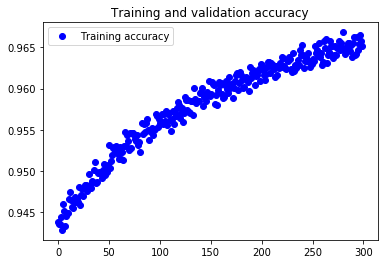

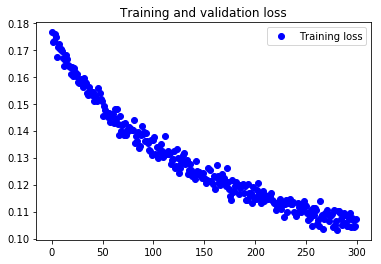

In [310]:
import matplotlib.pyplot as plt

%matplotlib inline

accuracy = history.history['acc']
#val_accuracy = history.history['val_acc']
loss = history.history['loss']
#val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
#plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
#plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
# plt.show()

## Testing:

In [311]:
predicted_classes = model.predict_classes(X_test)

In [312]:
# Testing:
score = model.evaluate(X_test, y_test, verbose=1)
print('The accuracy is: ', score[1])

10000/10000 [==============================] - 4s 407us/step
The accuracy is:  0.921
